In [1]:
# setup
%load_ext rich
%load_ext ensure_wd

In [2]:
# libs

from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from rich import print

In [3]:
from utils.load_config import get_conf

conf = get_conf(Path('../data/conf.toml'))

DATASET_CONF = conf['histopatological_cancer_detection']

TRAIN_PATH = Path('../data/raw/histopathologic-cancer-detection/train/')
TEST_PATH = Path('../data/raw/histopathologic-cancer-detection/test/')
TRAIN_LABELS_PATH = Path(
    '../data/raw/histopathologic-cancer-detection/train_labels.csv'
)

### Tamanho do dataset  e Distribuição de Classes 

In [4]:
files_train_gen = Path(TRAIN_PATH).glob('*.*')
files_test_gen = Path(TEST_PATH).glob('*.*')

train_list = [file for file in files_train_gen]
test_list = [file for file in files_test_gen]

In [ ]:
print(f'test: {len(test_list)}, train: {len(train_list)}')

In [ ]:
label_train_df = pd.read_csv(TRAIN_LABELS_PATH)

(label_train_df.tail(10), label_train_df.head(10))

In [ ]:
_ = sns.countplot(data=label_train_df, x='label')
plt.show()

In [ ]:
label_train_df.value_counts(['label'], normalize=True)

### Check de Sanidade de dados

In [9]:
from utils.data_sanity import SanityCheck

data_sanity_chekcs = SanityCheck(TRAIN_PATH)


In [10]:
# really bad way to do that
corrupeted_img = data_sanity_chekcs.check_corruption()
img_type = data_sanity_chekcs.check_typing()
img_mode = data_sanity_chekcs.check_mode()
img_dimensions = data_sanity_chekcs.check_dimensions()


In [ ]:
print(corrupeted_img)
print(img_dimensions)
print(img_mode)
print(img_type)


In [14]:

data_sanity_chekcs = SanityCheck(TEST_PATH)
# really bad way to do that
corrupeted_img = data_sanity_chekcs.check_corruption()
img_type = data_sanity_chekcs.check_typing()
img_mode = data_sanity_chekcs.check_mode()
img_dimensions = data_sanity_chekcs.check_dimensions()



In [ ]:
# test set 

print(corrupeted_img)
print(img_dimensions)
print(img_mode)
print(img_type)

In [ ]:
from utils.plots import plot_images_on_grid

plot_images_on_grid(path=TRAIN_PATH, sample_size=25)


In [ ]:
plot_images_on_grid(path=TEST_PATH, sample_size=25)

### Verificando distribuição de pixels no dataset

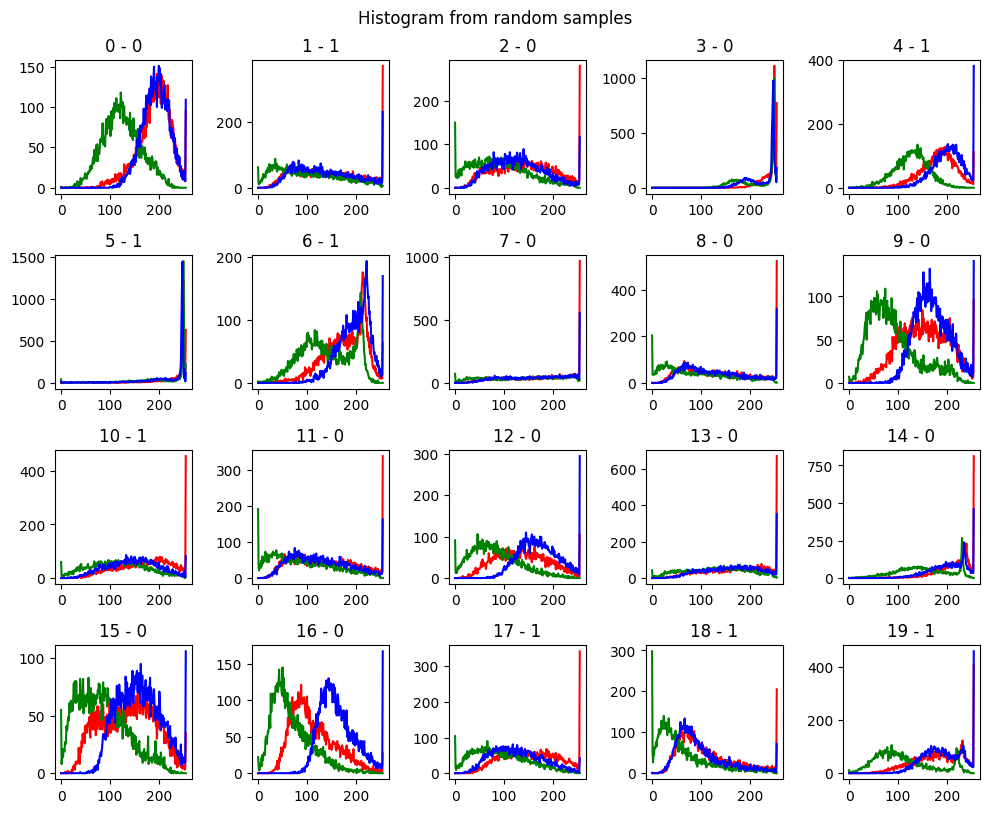

In [4]:
from utils.pixels_details import PixelsVerify

pixels = PixelsVerify(TRAIN_PATH, TRAIN_LABELS_PATH)
pixels.plot_histogram(sample_size=20)

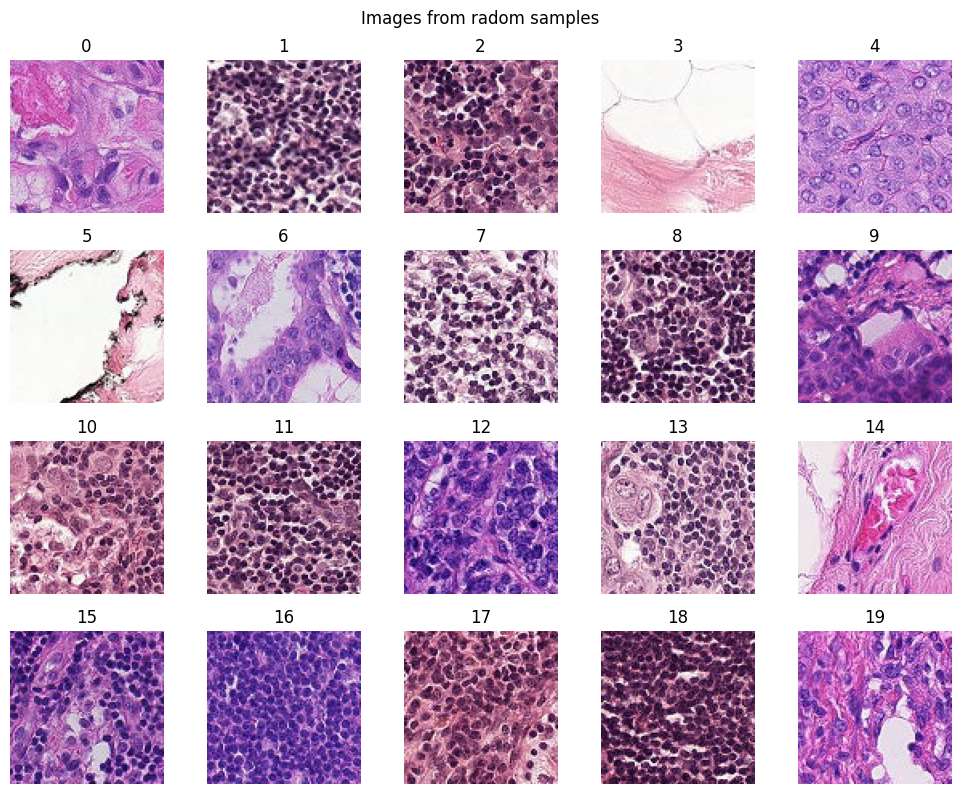

In [5]:
pixels.plot_images_from_histogram()